In [ ]:
!pip install open3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7

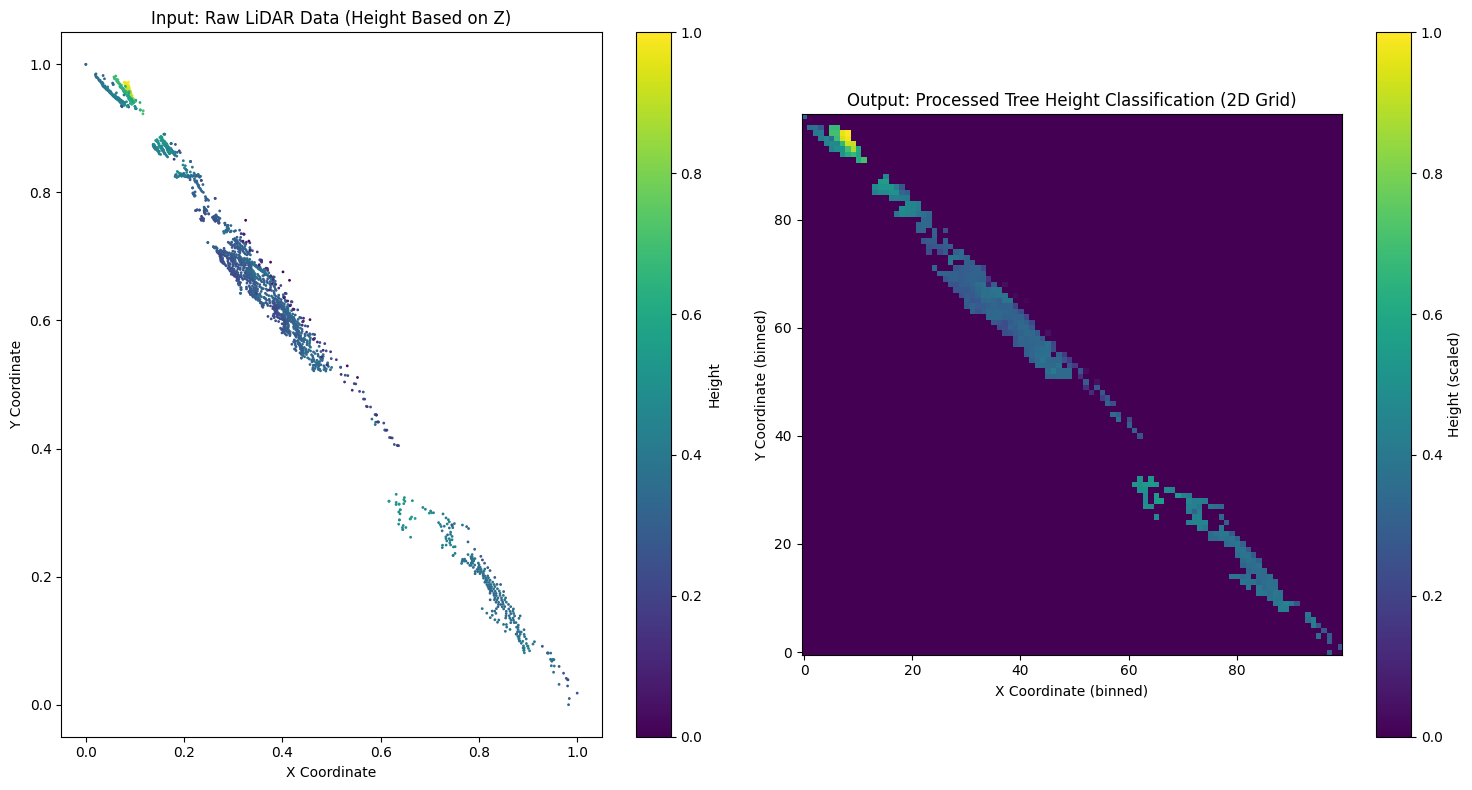

In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the point cloud data from the .pcd file
pcd = o3d.io.read_point_cloud('/content/deadWood_11.pcd')

# Extract the points (x, y, z) from the point cloud
points = np.asarray(pcd.points)

# Separate the x, y, z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Optionally, scale the x, y, z coordinates for better visualization and processing
scaler = MinMaxScaler()
xyz = np.vstack((x, y, z)).T  # Stack the coordinates into a (n_points, 3) array
xyz_scaled = scaler.fit_transform(xyz)  # Scale the x, y, z data

# Unpack the scaled data
x_scaled, y_scaled, z_scaled = xyz_scaled[:, 0], xyz_scaled[:, 1], xyz_scaled[:, 2]

# Grid size (number of bins for X and Y)
grid_size = 100  # You can adjust this based on your dataset

# Create a 2D histogram to bin the data (X, Y coordinates into grid)
# The bins will contain the maximum Z value for each grid cell
x_bins = np.linspace(np.min(x_scaled), np.max(x_scaled), grid_size)
y_bins = np.linspace(np.min(y_scaled), np.max(y_scaled), grid_size)

# Digitize the x, y points into grid
x_indices = np.digitize(x_scaled, x_bins) - 1
y_indices = np.digitize(y_scaled, y_bins) - 1

# Create an empty grid to store Z values (tree height)
height_grid = np.zeros((grid_size, grid_size))

# For each point, add its z value (height) to the corresponding grid cell
for i in range(len(x_scaled)):
    height_grid[y_indices[i], x_indices[i]] = max(height_grid[y_indices[i], x_indices[i]], z_scaled[i])

# Set up the plot with two subplots (one for input and one for output)
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Input visualization (scatter plot of raw data)
sc = axs[0].scatter(x_scaled, y_scaled, c=z_scaled, cmap='viridis', s=1)  # Scatter plot with color based on Z
axs[0].set_title("Input: Raw LiDAR Data (Height Based on Z)")
axs[0].set_xlabel("X Coordinate")
axs[0].set_ylabel("Y Coordinate")
fig.colorbar(sc, ax=axs[0], label="Height")

# Output visualization (processed 2D grid of tree height classification)
im = axs[1].imshow(height_grid, cmap='viridis', interpolation='nearest', origin='lower')
axs[1].set_title("Output: Processed Tree Height Classification (2D Grid)")
axs[1].set_xlabel("X Coordinate (binned)")
axs[1].set_ylabel("Y Coordinate (binned)")
fig.colorbar(im, ax=axs[1], label="Height (scaled)")

# Show both plots side by side
plt.tight_layout()
plt.show()

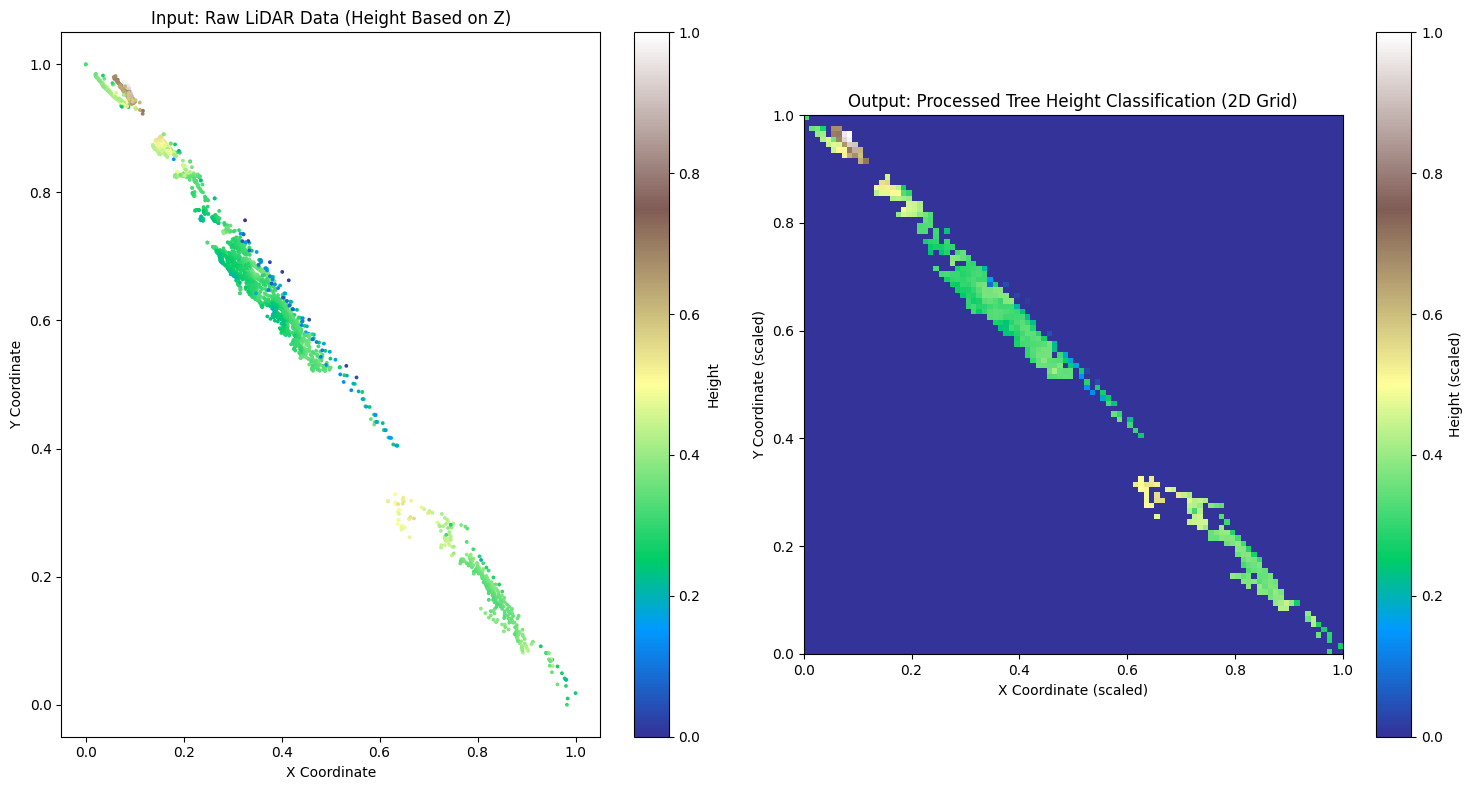

In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the point cloud data from the .pcd file
pcd = o3d.io.read_point_cloud('/content/deadWood_11.pcd')

# Extract the points (x, y, z) from the point cloud
points = np.asarray(pcd.points)

# Separate the x, y, z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Scale the x, y, z coordinates for better visualization and processing
scaler = MinMaxScaler()
xyz = np.vstack((x, y, z)).T  # Stack the coordinates into a (n_points, 3) array
xyz_scaled = scaler.fit_transform(xyz)  # Scale the x, y, z data

# Unpack the scaled data
x_scaled, y_scaled, z_scaled = xyz_scaled[:, 0], xyz_scaled[:, 1], xyz_scaled[:, 2]

# Grid size (number of bins for X and Y)
grid_size = 100  # Adjust this based on your dataset

# Create a 2D histogram to bin the data (X, Y coordinates into grid)
x_bins = np.linspace(np.min(x_scaled), np.max(x_scaled), grid_size)
y_bins = np.linspace(np.min(y_scaled), np.max(y_scaled), grid_size)

# Digitize the x, y points into grid
x_indices = np.digitize(x_scaled, x_bins) - 1
y_indices = np.digitize(y_scaled, y_bins) - 1

# Create an empty grid to store Z values (tree height)
height_grid = np.zeros((grid_size, grid_size))

# For each point, add its z value (height) to the corresponding grid cell
for i in range(len(x_scaled)):
    height_grid[y_indices[i], x_indices[i]] = max(height_grid[y_indices[i], x_indices[i]], z_scaled[i])

# Normalize the height grid for consistent color mapping
height_grid = (height_grid - np.min(height_grid)) / (np.max(height_grid) - np.min(height_grid))

# Set up the plot with two subplots (one for input and one for output)
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Input visualization (scatter plot of raw data)
sc = axs[0].scatter(
    x_scaled, y_scaled, c=z_scaled, cmap='terrain', s=3  # Updated colormap and point size
)
axs[0].set_title("Input: Raw LiDAR Data (Height Based on Z)")
axs[0].set_xlabel("X Coordinate")
axs[0].set_ylabel("Y Coordinate")
fig.colorbar(sc, ax=axs[0], label="Height")

# Output visualization (processed 2D grid of tree height classification)
im = axs[1].imshow(
    height_grid, cmap='terrain', interpolation='nearest', origin='lower',
    extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]  # Proper coordinate ranges
)
axs[1].set_title("Output: Processed Tree Height Classification (2D Grid)")
axs[1].set_xlabel("X Coordinate (scaled)")
axs[1].set_ylabel("Y Coordinate (scaled)")
fig.colorbar(im, ax=axs[1], label="Height (scaled)")

# Show both plots side by side
plt.tight_layout()
plt.show()


In [ ]:
!pip install laspy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.1 MB/s eta 0:00:00


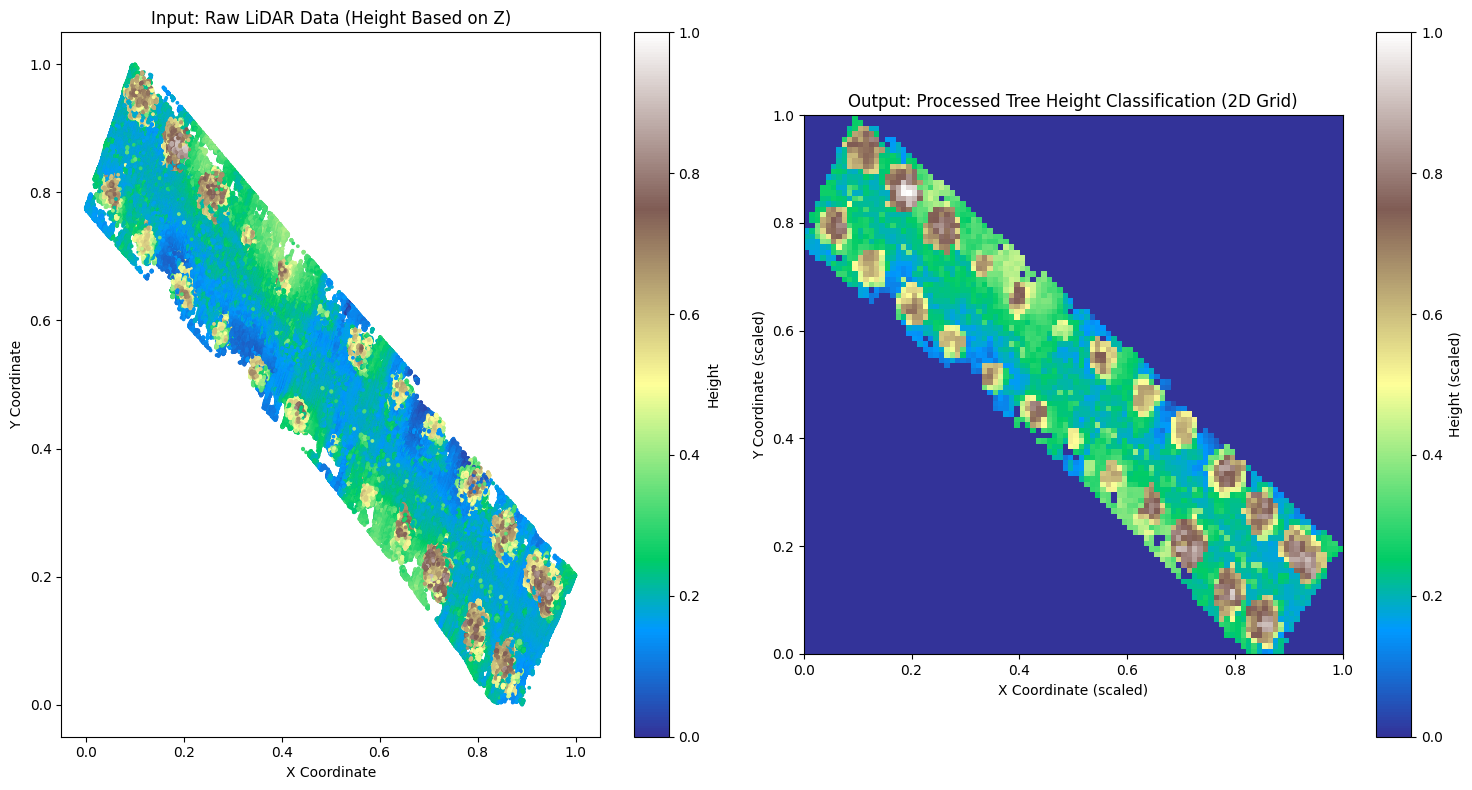

In [ ]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the LAS file
las_file_path = '/content/laser_medido_12_paper.las'
las = laspy.read(las_file_path)

# Extract the points (x, y, z) from the LAS file
x = las.x
y = las.y
z = las.z

# Scale the x, y, z coordinates for better visualization and processing
scaler = MinMaxScaler()
xyz = np.vstack((x, y, z)).T  # Stack the coordinates into a (n_points, 3) array
xyz_scaled = scaler.fit_transform(xyz)  # Scale the x, y, z data

# Unpack the scaled data
x_scaled, y_scaled, z_scaled = xyz_scaled[:, 0], xyz_scaled[:, 1], xyz_scaled[:, 2]

# Grid size (number of bins for X and Y)
grid_size = 100  # Adjust this based on your dataset

# Create a 2D histogram to bin the data (X, Y coordinates into grid)
x_bins = np.linspace(np.min(x_scaled), np.max(x_scaled), grid_size)
y_bins = np.linspace(np.min(y_scaled), np.max(y_scaled), grid_size)

# Digitize the x, y points into grid
x_indices = np.digitize(x_scaled, x_bins) - 1
y_indices = np.digitize(y_scaled, y_bins) - 1

# Create an empty grid to store Z values (tree height)
height_grid = np.zeros((grid_size, grid_size))

# For each point, add its z value (height) to the corresponding grid cell
for i in range(len(x_scaled)):
    height_grid[y_indices[i], x_indices[i]] = max(height_grid[y_indices[i], x_indices[i]], z_scaled[i])

# Normalize the height grid for consistent color mapping
height_grid = (height_grid - np.min(height_grid)) / (np.max(height_grid) - np.min(height_grid))

# Set up the plot with two subplots (one for input and one for output)
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Input visualization (scatter plot of raw data)
sc = axs[0].scatter(
    x_scaled, y_scaled, c=z_scaled, cmap='terrain', s=3  # Updated colormap and point size
)
axs[0].set_title("Input: Raw LiDAR Data (Height Based on Z)")
axs[0].set_xlabel("X Coordinate")
axs[0].set_ylabel("Y Coordinate")
fig.colorbar(sc, ax=axs[0], label="Height")

# Output visualization (processed 2D grid of tree height classification)
im = axs[1].imshow(
    height_grid, cmap='terrain', interpolation='nearest', origin='lower',
    extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]]  # Proper coordinate ranges
)
axs[1].set_title("Output: Processed Tree Height Classification (2D Grid)")
axs[1].set_xlabel("X Coordinate (scaled)")
axs[1].set_ylabel("Y Coordinate (scaled)")
fig.colorbar(im, ax=axs[1], label="Height (scaled)")

# Show both plots side by side
plt.tight_layout()
plt.show()
